In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
df1=pd.read_excel(r"D:\Новая папка\\Users\\HP\Загрузки\hw_data_composite/X_nup.xlsx")

In [4]:
df2=pd.read_excel(r"D:\Новая папка\\Users\\HP\Загрузки\hw_data_composite/X_bp.xlsx")

In [5]:
df=df2.merge(df1, how="inner")
df1.dropna(inplace=True)

In [6]:
df.drop('Unnamed: 0',axis = 1, inplace = True)
print(df.shape)
df.head()

(1023, 13)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [7]:
Q1 = df2.quantile(q=.25)
Q3 = df2.quantile(q=.75)
IQR = Q3 - Q1
df = df2[~((df2 < (Q1-1.5*IQR)) | (df2 > (Q3+1.5*IQR))).any(axis=1)]

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
columns = df.columns
df = scaler.fit_transform(np.array(df))
df = pd.DataFrame(df, columns=columns)

In [9]:
y_label = ['Соотношение матрица-наполнитель']
y = df[y_label]
X = df.drop(y_label, axis = 1)
y.shape,X.shape

((961, 1), (961, 10))

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)

In [11]:
model=Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="linear"))
model.compile(optimizer="adam", loss="MeanSquaredError")
history=model.fit(X_train, y_train,
                 epochs=20,
                 batch_size=256,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 2s 209ms/step - loss: 0.1786 - val_loss: 0.0523
Epoch 2/20
3/3 [==============================] - 0s 31ms/step - loss: 0.0544 - val_loss: 0.0564
Epoch 3/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0760 - val_loss: 0.0575
Epoch 4/20
3/3 [==============================] - 0s 28ms/step - loss: 0.0636 - val_loss: 0.0388
Epoch 5/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0467 - val_loss: 0.0402
Epoch 6/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0483 - val_loss: 0.0463
Epoch 7/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0472 - val_loss: 0.0454
Epoch 8/20
3/3 [==============================] - 0s 39ms/step - loss: 0.0486 - val_loss: 0.0402
Epoch 9/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0443 - val_loss: 0.0368
Epoch 10/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0418 - val_loss: 0.0367
Epoch 11/20
3/3 [===========

In [17]:
history.history
# результат

{'loss': [0.17857585847377777,
  0.054381370544433594,
  0.07604163140058517,
  0.06364764273166656,
  0.04672016575932503,
  0.04829690605401993,
  0.04722577705979347,
  0.048552971333265305,
  0.044334907084703445,
  0.04179663211107254,
  0.04336076229810715,
  0.043123774230480194,
  0.04295697808265686,
  0.041837792843580246,
  0.04239580035209656,
  0.039974112063646317,
  0.04041614010930061,
  0.040199536830186844,
  0.039627332240343094,
  0.03976493701338768],
 'val_loss': [0.052258480340242386,
  0.05638979747891426,
  0.05748623237013817,
  0.038848765194416046,
  0.040159955620765686,
  0.04628102108836174,
  0.04536238685250282,
  0.04022136703133583,
  0.03682957589626312,
  0.036708731204271317,
  0.03687245026230812,
  0.03637681528925896,
  0.03703285753726959,
  0.03812030702829361,
  0.037968702614307404,
  0.036999017000198364,
  0.036211058497428894,
  0.0361594595015049,
  0.0365372970700264,
  0.037357620894908905]}

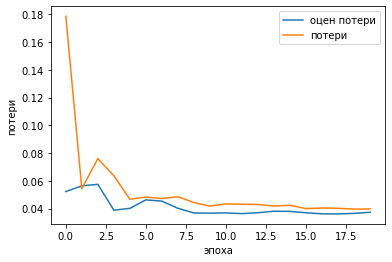

In [15]:
plt.plot(history.history["val_loss"],
        label="оцен потери")
plt.plot(history.history["loss"],
        label="потери")
plt.xlabel("эпоха")
plt.ylabel("потери")
plt.legend()
plt.show()

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               2200      
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________
